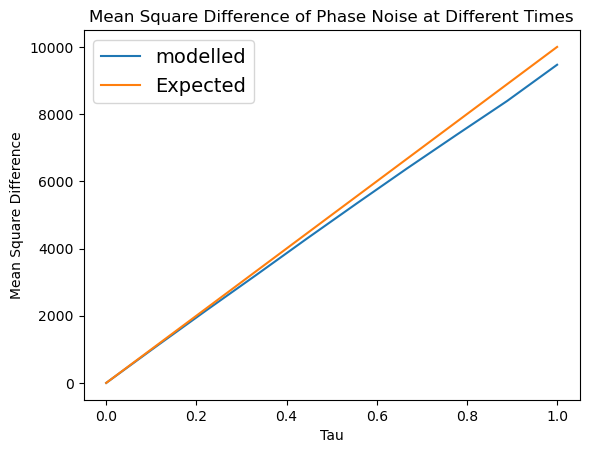

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_phase_noise(dt, num_steps):
    # Generate uncorrelated Gaussian random numbers
    random_numbers = np.random.normal(0, 1, num_steps)

    # Compute the phase noise signal
    phase_noise = np.cumsum(random_numbers) * np.sqrt(dt/tc)

    return phase_noise

# Parameters
tau_values = np.linspace(0, 1, num=10)   # Time intervals (can be adjusted)
dt = 0.01   # Time step size
num_steps = 80000   # Number of time steps
tc = 1e-4

# Generate the phase noise signal
phase_noise = generate_phase_noise(dt, num_steps)

# Calculate the mean square difference at different times t and t+tau
mse_values = []
for tau in tau_values:
    shifted_pn = np.concatenate((phase_noise[int(tau/dt):], np.zeros(int(tau/dt))))
    mse = np.mean((phase_noise[:num_steps-int(tau/dt)] - shifted_pn[:num_steps-int(tau/dt)])**2)
    mse_values.append(mse)

expected = tau_values/tc

# Plot the mean square difference as a function of tau
fig1 = plt.figure()
plt.plot(tau_values, mse_values, label = 'modelled')
plt.plot(tau_values, expected, label = 'Expected')
plt.xlabel('Tau')
plt.ylabel('Mean Square Difference')
plt.title('Mean Square Difference of Phase Noise at Different Times')
plt.legend(fontsize = 14)
plt.show()
